## 🥋 Training Base Models on Wine Quality Dataset

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Loading the datasets
train = pd.read_csv("../dataset/wine-train-balanced.csv")
print(train.shape)
test = pd.read_csv("../dataset/wine-test.csv")
print(test.shape)

(6898, 13)
(1064, 13)


In [3]:
train.sample(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,quality
5097,5.425618,0.140692,0.322699,1.879932,0.033796,82.342455,163.664386,0.989462,3.367575,0.548959,12.479590,1,1
180,7.100000,0.350000,0.240000,15.400000,0.055000,46.000000,198.000000,0.998800,3.120000,0.490000,8.800000,1,0
6408,5.822508,0.220000,0.291026,1.336752,0.027123,25.754983,101.122508,0.989703,3.342650,0.405727,12.389743,1,1
2378,6.300000,0.360000,0.190000,3.200000,0.075000,15.000000,39.000000,0.995600,3.560000,0.520000,12.700000,0,0
4572,6.896844,0.234102,0.336844,2.759958,0.032221,24.000000,121.094671,0.990222,3.144102,0.378738,12.406311,1,1
2276,6.100000,0.310000,0.370000,8.400000,0.031000,70.000000,170.000000,0.993400,3.420000,0.400000,11.700000,1,1
1993,7.000000,0.160000,0.250000,14.300000,0.044000,27.000000,149.000000,0.998000,2.910000,0.460000,9.200000,1,0


In [4]:
test.sample(7)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,wine_type,quality
33,6.2,0.19,0.38,5.10,0.019,22.0,82.0,0.98961,3.05,0.36,12.5,1,0
295,7.8,0.34,0.35,1.80,0.042,8.0,167.0,0.99080,3.11,0.41,12.1,1,0
741,6.4,0.37,0.37,4.85,0.041,39.5,216.5,0.99432,3.10,0.50,9.8,1,0
173,9.6,0.25,0.54,1.30,0.040,16.0,160.0,0.99380,2.94,0.43,10.5,1,0
677,7.8,0.32,0.33,2.40,0.037,18.0,101.0,0.99120,3.21,0.65,11.7,1,1
513,5.8,0.25,0.24,13.30,0.044,41.0,137.0,0.99720,3.34,0.42,9.5,1,0
597,6.7,0.41,0.34,9.20,0.049,29.0,150.0,0.99680,3.22,0.51,9.1,1,0


In [ ]:
# Separating training and test sets into features and labels
# X_train, y_train = train.drop(["quality"], axis=1).values, train["quality"].values
# X_test, y_test = test.drop(["quality"], axis=1).values, test["quality"].values

In [16]:
# Separating training and test sets into features and labels
X_train, y_train = train.drop(["quality"], axis=1), train["quality"]
X_test, y_test = test.drop(["quality"], axis=1), test["quality"]

In [17]:
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (6898, 12) (6898,)
Test shape: (1064, 12) (1064,)


### Random Forest Model

I'll start by training a RandomForest model on the training set. Although, already an ensemble, this would be one of the base models I would use to build my custom ensemble.

In [18]:
rf_classifier = RandomForestClassifier(n_estimators=20, max_depth=10, criterion="entropy", random_state=33)
rf_classifier.fit(X_train, y_train)

,n_estimators,20
,criterion,'entropy'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_preds = rf_classifier.predict(X_test)

print("Random Forest Test Accuracy: {:.4f}".format(accuracy_score(y_test, rf_preds)))

Random Forest Test Accuracy: 0.7998


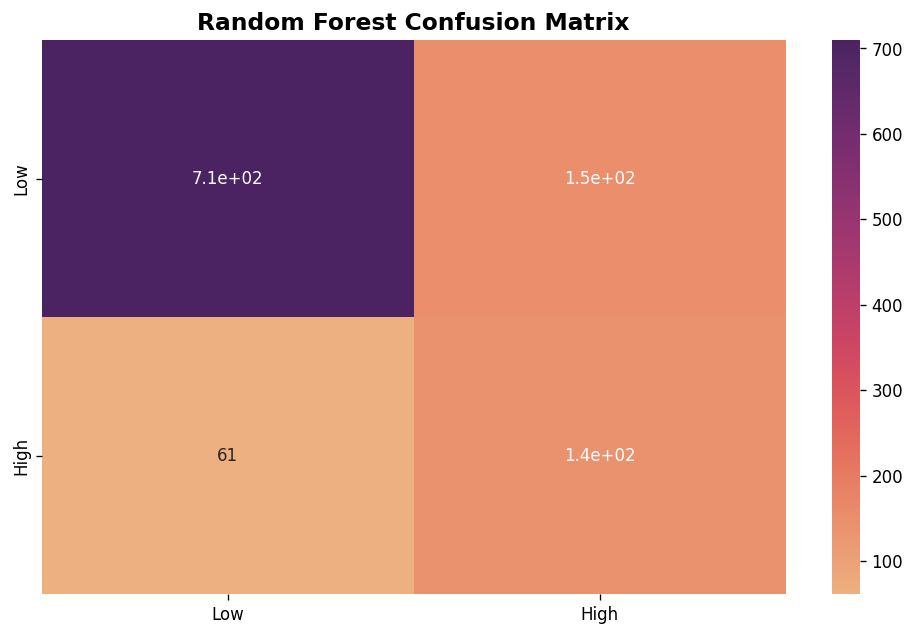

In [ ]:
class_names = ["Low", "High"]
cm = confusion_matrix(y_test, rf_preds)

plt.figure(figsize=(10, 6), dpi=120)
sns.heatmap(
    cm,
    annot=True,
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="flare"
)

plt.title("Random Forest Confusion Matrix", fontsize=14, fontweight="bold")
plt.savefig("../img/rf-confusion-matrix.png")
plt.show()


### LightGBM Model

This would be another model that would be combined to create the custom ensemble

In [33]:
lgbm_clf = LGBMClassifier(n_estimators=50, learning_rate=0.01, random_state=33)
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3449, number of negative: 3449
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2806
[LightGBM] [Info] Number of data points in the train set: 6898, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.01
,n_estimators,50
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [41]:
lgbm_preds = lgbm_clf.predict(X_test)
print("LightGBM Test Accuary: {:.4f}".format(accuracy_score(y_test, lgbm_preds)))

LightGBM Test Accuary: 0.7801


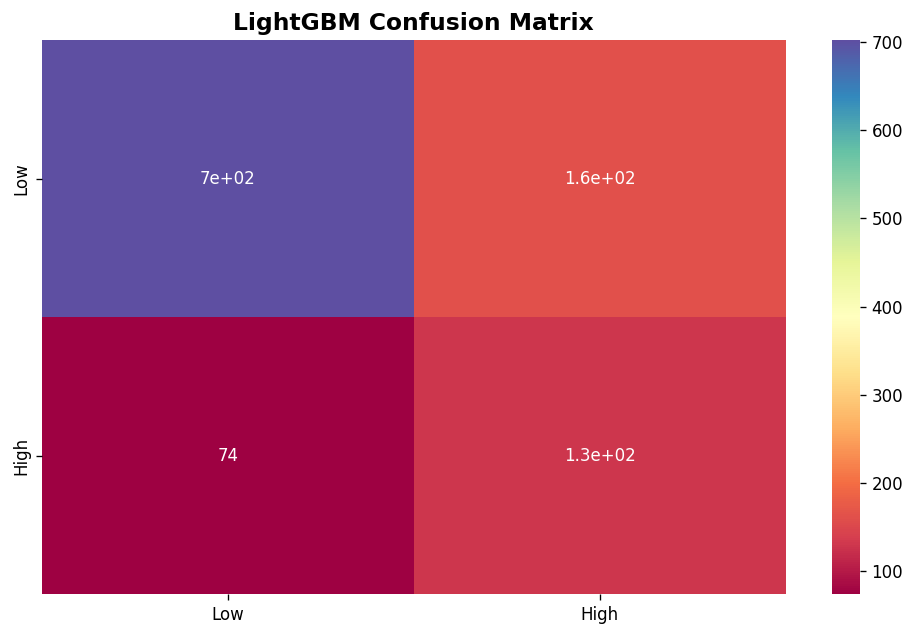

In [ ]:
cm = confusion_matrix(y_test, lgbm_preds)

plt.figure(figsize=(10, 6), dpi=120)
sns.heatmap(
    cm,
    annot=True,
    xticklabels=class_names,
    yticklabels=class_names,
    cmap="Spectral"
)

plt.title("LightGBM Confusion Matrix", fontsize=14, fontweight="bold")
plt.savefig("../img/lgbm-confusion-matrix.png")
plt.show()

In another experiment, I would finetune the hyperparameters of these models to get the best paramters for the data, and then use this parameters to train the models and build the ensemble with them.

In [44]:
# Saving both models for hyperparamter tuning
import pickle

with open("../artifacts/rf_base_v1.pkl", "wb") as file:
    pickle.dump(rf_classifier, file)

with open("../artifacts/lgbm_base_V1.pkl", "wb") as file:
    pickle.dump(lgbm_clf, file)